In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft
from numpy.polynomial.legendre import leggauss
from scipy import special
from scipy.integrate import quadrature

In [3]:
#Number 1
def f(x):
    return np.exp(np.cos(np.pi*x))

In [4]:
def simp(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    S = (h/3)*np.dot(f(x),w)
    return S

In [5]:
def trap(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1] = 2
    T = (h/2)*np.dot(f(x),w)
    return T

In [6]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [7]:
def mygauss(N,f,a=-1,b=1):
    x, w = np.polynomial.legendre.leggauss(N)
    xt,wt = transint(x,w,a,b)
    return wt.dot(f(xt))

In [8]:
def clencurt(n1):
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

In [9]:
def myclencurt(N, func, a = -1, b = 1):
    x, w = clencurt(N)
    x, w = transint(x,w,a,b)
    return w.dot(func(x))

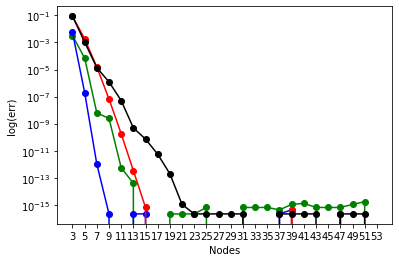

In [10]:
a=0
b=1
errg = []
errt = []
errs = []
errc = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,f,a,b)
    T = trap(f,a,b,N)
    S = simp(f,a,b,N)
    C = myclencurt(N,f,a,b)
    errg.append(np.fabs(G-special.iv(0,1)))
    errt.append(np.fabs(T-special.iv(0,1)))
    errs.append(np.fabs(S-special.iv(0,1)))
    errc.append(np.fabs(C-special.iv(0,1)))
plt.semilogy(Nvec,errg,'go-',Nvec,errt,'bo-',Nvec,errs,'ro-',Nvec,errc,'ko-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);
#Green is Gauss, Blue is Trapezoidal, Red is Simpsons, Black is Clenshaw-Curtis

In [11]:
def g(x):
    return np.cos(((np.pi)/2)*x**2)

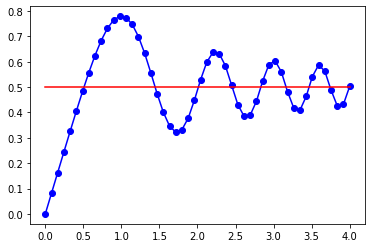

In [14]:
x = np.linspace(np.finfo(float).eps,4) 
y = [] 
for val in x:
     y.append(mygauss(13,g,0,val))
plt.plot(x,y, 'bo-', x, (x*0)+0.5, 'r')

In [12]:
quadrature(g,0,4,tol=10**-16,maxiter=50)

(0.4984260317699557, 2.4417338706506087e-09)